In [1]:
###Implementing Various Trend Based, Volume Based and Momentum Based Trading Strategy

# Technical Indicator implementation and simple next day sell strategy using MACD and RSI test

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
# start_date = datetime.datetime.now() - datetime.timedelta(days=10*365)
# stock = yf.download("^NSEI",start = start_date,end = datetime.datetime.now())
stock_symbol = 'BTC-USD'
timeframe = '5m'
stock = yf.download(stock_symbol, interval=timeframe, period='1mo')
stock.index

[*********************100%%**********************]  1 of 1 completed


DatetimeIndex(['2024-05-13 18:50:00+00:00', '2024-05-13 18:55:00+00:00',
               '2024-05-13 19:00:00+00:00', '2024-05-13 19:05:00+00:00',
               '2024-05-13 19:10:00+00:00', '2024-05-13 19:15:00+00:00',
               '2024-05-13 19:20:00+00:00', '2024-05-13 19:25:00+00:00',
               '2024-05-13 19:30:00+00:00', '2024-05-13 19:35:00+00:00',
               ...
               '2024-06-13 18:05:00+00:00', '2024-06-13 18:10:00+00:00',
               '2024-06-13 18:15:00+00:00', '2024-06-13 18:20:00+00:00',
               '2024-06-13 18:25:00+00:00', '2024-06-13 18:30:00+00:00',
               '2024-06-13 18:35:00+00:00', '2024-06-13 18:40:00+00:00',
               '2024-06-13 18:45:00+00:00', '2024-06-13 18:50:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=8929, freq=None)

In [ ]:
# stock = stock[stock['Volume'] != 0]
stock['daily_change'] = stock['Close'].diff()

def rsi_cal(length):
  stock['gain'] = stock['daily_change'].apply(lambda x: x if x > 0 else 0)
  stock['loss'] = stock['daily_change'].apply(lambda x: -x if x < 0 else 0)
  stock['rsi'] = 100 - (100/(1+(stock['gain'].rolling(window=length).mean()/stock['loss'].rolling(window=length).mean())))
  stock.drop(columns='gain',inplace = True)
  stock.drop(columns='loss',inplace = True)

rsi_cal(14)
stock


Open          High           Low  \
Datetime                                                              
2024-05-13 17:55:00+00:00  62812.949219  62812.949219  62793.691406   
2024-05-13 18:00:00+00:00  62796.683594  62796.683594  62733.218750   
2024-05-13 18:05:00+00:00  62734.226562  62768.203125  62683.871094   
2024-05-13 18:10:00+00:00  62705.722656  62705.722656  62680.277344   
2024-05-13 18:15:00+00:00  62671.371094  62742.890625  62671.371094   
...                                 ...           ...           ...   
2024-06-13 17:35:00+00:00  66745.914062  66750.281250  66698.914062   
2024-06-13 17:40:00+00:00  66871.203125  66871.203125  66814.304688   
2024-06-13 17:45:00+00:00  66843.570312  66843.570312  66785.265625   
2024-06-13 17:50:00+00:00  66827.250000  66891.500000  66827.250000   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438  66889.023438   

                                  Close     Adj Close    Volume  daily_change  \
Datetime                                                                        
2024-05-13 17:55:00+00:00  62793.691406  62793.691406         0           NaN   
2024-05-13 18:00:00+00:00  62745.683594  62745.683594         0    -48.007812   
2024-05-13 18:05:00+00:00  62683.871094  62683.871094  30423040    -61.812500   
2024-05-13 18:10:00+00:00  62680.277344  62680.277344  31938560     -3.593750   
2024-05-13 18:15:00+00:00  62742.890625  62742.890625  23191552     62.613281   
...                                 ...           ...       ...           ...   
2024-06-13 17:35:00+00:00  66749.601562  66749.601562    724992      2.437500   
2024-06-13 17:40:00+00:00  66814.304688  66814.304688  78573568     64.703125   
2024-06-13 17:45:00+00:00  66812.820312  66812.820312  10895360     -1.484375   
2024-06-13 17:50:00+00:00  66849.851562  66849.851562  27807744     37.031250   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438         0     39.171875   

                                 rsi  
Datetime                              
2024-05-13 17:55:00+00:00        NaN  
2024-05-13 18:00:00+00:00        NaN  
2024-05-13 18:05:00+00:00        NaN  
2024-05-13 18:10:00+00:00        NaN  
2024-05-13 18:15:00+00:00        NaN  
...                              ...  
2024-06-13 17:35:00+00:00  58.360121  
2024-06-13 17:40:00+00:00  61.549658  
2024-06-13 17:45:00+00:00  61.384295  
2024-06-13 17:50:00+00:00  60.315900  
2024-06-13 17:55:00+00:00  61.852127  

[8929 rows x 8 columns]

In [ ]:
#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
from scipy.stats import pearsonr
from scipy.stats import spearmanr
def correl_(x,y):
  new_data = stock.dropna(subset=[y])
  correlation_matrix = stock[[x, y]].corr()
  print(f'correlation matrix {correlation_matrix}')
  corr= pearsonr(new_data[x], new_data[y])
  print(f'pearsonr {corr}')
  corr= spearmanr(new_data[x], new_data[y])
  print(f'spearnamr {corr}')

correl_('Close','rsi')


In [ ]:
def moving_average(length):
  stock['ma'+str(length)] = stock['Close'].rolling(window=length).mean()

moving_average(21)
moving_average(20)
moving_average(50)
stock.tail()

Open          High           Low  \
Datetime                                                              
2024-06-13 17:35:00+00:00  66745.914062  66750.281250  66698.914062   
2024-06-13 17:40:00+00:00  66871.203125  66871.203125  66814.304688   
2024-06-13 17:45:00+00:00  66843.570312  66843.570312  66785.265625   
2024-06-13 17:50:00+00:00  66827.250000  66891.500000  66827.250000   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438  66889.023438   

                                  Close     Adj Close    Volume  daily_change  \
Datetime                                                                        
2024-06-13 17:35:00+00:00  66749.601562  66749.601562    724992      2.437500   
2024-06-13 17:40:00+00:00  66814.304688  66814.304688  78573568     64.703125   
2024-06-13 17:45:00+00:00  66812.820312  66812.820312  10895360     -1.484375   
2024-06-13 17:50:00+00:00  66849.851562  66849.851562  27807744     37.031250   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438         0     39.171875   

                                 rsi          ma21          ma20          ma50  
Datetime                                                                        
2024-06-13 17:35:00+00:00  58.360121  66711.043527  66727.041797  67094.784687  
2024-06-13 17:40:00+00:00  61.549658  66731.197173  66752.466406  67069.638281  
2024-06-13 17:45:00+00:00  61.384295  66755.340402  66762.983984  67041.601875  
2024-06-13 17:50:00+00:00  60.315900  66767.120536  66770.094141  67015.779375  
2024-06-13 17:55:00+00:00  61.852127  66775.757440  66779.242188  66995.267344

In [ ]:
def calculate_bollinger_bands(k, window_size):
    stock['st_deviation'] = stock['Close'].rolling(window=window_size).std()
    stock['bandwidth'] = k * stock['st_deviation']
    stock['bollinger_UB'] = stock['ma20'] + stock['bandwidth']
    stock['bollinger_LB'] = stock['ma20'] - stock['bandwidth']
    stock.drop(columns='st_deviation',inplace = True)
    stock.drop(columns='bandwidth',inplace = True)

calculate_bollinger_bands(1,20)
stock.tail()

Open          High           Low  \
Datetime                                                              
2024-06-13 17:35:00+00:00  66745.914062  66750.281250  66698.914062   
2024-06-13 17:40:00+00:00  66871.203125  66871.203125  66814.304688   
2024-06-13 17:45:00+00:00  66843.570312  66843.570312  66785.265625   
2024-06-13 17:50:00+00:00  66827.250000  66891.500000  66827.250000   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438  66889.023438   

                                  Close     Adj Close    Volume  daily_change  \
Datetime                                                                        
2024-06-13 17:35:00+00:00  66749.601562  66749.601562    724992      2.437500   
2024-06-13 17:40:00+00:00  66814.304688  66814.304688  78573568     64.703125   
2024-06-13 17:45:00+00:00  66812.820312  66812.820312  10895360     -1.484375   
2024-06-13 17:50:00+00:00  66849.851562  66849.851562  27807744     37.031250   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438         0     39.171875   

                                 rsi          ma21          ma20  \
Datetime                                                           
2024-06-13 17:35:00+00:00  58.360121  66711.043527  66727.041797   
2024-06-13 17:40:00+00:00  61.549658  66731.197173  66752.466406   
2024-06-13 17:45:00+00:00  61.384295  66755.340402  66762.983984   
2024-06-13 17:50:00+00:00  60.315900  66767.120536  66770.094141   
2024-06-13 17:55:00+00:00  61.852127  66775.757440  66779.242188   

                                   ma50  bollinger_UB  bollinger_LB  
Datetime                                                             
2024-06-13 17:35:00+00:00  67094.784687  66891.196321  66562.887273  
2024-06-13 17:40:00+00:00  67069.638281  66884.103851  66620.828961  
2024-06-13 17:45:00+00:00  67041.601875  66890.339853  66635.628115  
2024-06-13 17:50:00+00:00  67015.779375  66898.165604  66642.022677  
2024-06-13 17:55:00+00:00  66995.267344  66909.022181  66649.462194

In [ ]:
def calculate_macd():
  stock['ShortEMA'] = stock['Close'].ewm(span=12, adjust=False).mean()
  stock['LongEMA'] = stock['Close'].ewm(span=26, adjust=False).mean()
  stock['MACD'] = stock['ShortEMA'] - stock['LongEMA']
  signal_window = 9
  stock['Signal_Line'] = stock['MACD'].ewm(span=signal_window, adjust=False).mean()
  stock['macd_diff'] = stock['MACD'] - stock['Signal_Line']
  stock.drop(columns='ShortEMA',inplace = True)
  stock.drop(columns='LongEMA',inplace = True)
  stock.drop(columns='MACD',inplace = True)
  stock.drop(columns='Signal_Line',inplace = True)

calculate_macd()
stock.tail()

Open          High           Low  \
Datetime                                                              
2024-06-13 17:35:00+00:00  66745.914062  66750.281250  66698.914062   
2024-06-13 17:40:00+00:00  66871.203125  66871.203125  66814.304688   
2024-06-13 17:45:00+00:00  66843.570312  66843.570312  66785.265625   
2024-06-13 17:50:00+00:00  66827.250000  66891.500000  66827.250000   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438  66889.023438   

                                  Close     Adj Close    Volume  daily_change  \
Datetime                                                                        
2024-06-13 17:35:00+00:00  66749.601562  66749.601562    724992      2.437500   
2024-06-13 17:40:00+00:00  66814.304688  66814.304688  78573568     64.703125   
2024-06-13 17:45:00+00:00  66812.820312  66812.820312  10895360     -1.484375   
2024-06-13 17:50:00+00:00  66849.851562  66849.851562  27807744     37.031250   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438         0     39.171875   

                                 rsi          ma21          ma20  \
Datetime                                                           
2024-06-13 17:35:00+00:00  58.360121  66711.043527  66727.041797   
2024-06-13 17:40:00+00:00  61.549658  66731.197173  66752.466406   
2024-06-13 17:45:00+00:00  61.384295  66755.340402  66762.983984   
2024-06-13 17:50:00+00:00  60.315900  66767.120536  66770.094141   
2024-06-13 17:55:00+00:00  61.852127  66775.757440  66779.242188   

                                   ma50  bollinger_UB  bollinger_LB  macd_diff  
Datetime                                                                        
2024-06-13 17:35:00+00:00  67094.784687  66891.196321  66562.887273  27.367119  
2024-06-13 17:40:00+00:00  67069.638281  66884.103851  66620.828961  27.086103  
2024-06-13 17:45:00+00:00  67041.601875  66890.339853  66635.628115  26.101037  
2024-06-13 17:50:00+00:00  67015.779375  66898.165604  66642.022677  27.124812  
2024-06-13 17:55:00+00:00  66995.267344  66909.022181  66649.462194  29.428808

In [ ]:
#-1 correspond to sell
# 1 correspond to buy
# 0 correspond to neutral
def bollinger_signal():
  stock['bollinger_buy_sell'] = np.where(stock['Close'] > stock['bollinger_UB'], -1, np.where(stock['Close'] < stock['bollinger_LB'], 1, 0))

def rsi_signal():
  stock['rsi_buy_sell'] = np.where(stock['rsi'] > 65, -1, np.where(stock['rsi'] < 35, 1, 0))

def macd_signal():
  stock['macd_buy_sell'] = np.where(stock['macd_diff'] >= 0, 1, np.where(stock['macd_diff'] < 0, -1, 0))

def ma_signal():
  stock['ma_buy_sell'] = 0
  stock.loc[stock['ma20'] >= stock['ma50'], 'ma_buy_sell'] = 1
  stock.loc[stock['ma20'] < stock['ma50'], 'ma_buy_sell'] = -1

def calculate_real_market_indicator_2BS():
    stock['Real_Market_indicator_2BS'] = 0
    stock.loc[stock['daily_change'] >= 0 , 'Real_Market_indicator_2BS'] = 1
    stock.loc[stock['daily_change'] < 0, 'Real_Market_indicator_2BS'] = -1
    stock['Real_Market_indicator_2BS'] = stock['Real_Market_indicator_2BS'].shift(-1)

bollinger_signal()
rsi_signal()
macd_signal()
# ma_signal()
# calculate_real_market_indicator_2BS()
stock.dropna()

Open          High           Low  \
Datetime                                                              
2024-05-13 22:00:00+00:00  62888.941406  62923.773438  62888.941406   
2024-05-13 22:05:00+00:00  62896.941406  62922.394531  62888.761719   
2024-05-13 22:10:00+00:00  62907.812500  62907.812500  62866.214844   
2024-05-13 22:15:00+00:00  62869.253906  62895.988281  62869.253906   
2024-05-13 22:20:00+00:00  62869.691406  62869.691406  62848.539062   
...                                 ...           ...           ...   
2024-06-13 17:35:00+00:00  66745.914062  66750.281250  66698.914062   
2024-06-13 17:40:00+00:00  66871.203125  66871.203125  66814.304688   
2024-06-13 17:45:00+00:00  66843.570312  66843.570312  66785.265625   
2024-06-13 17:50:00+00:00  66827.250000  66891.500000  66827.250000   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438  66889.023438   

                                  Close     Adj Close    Volume  daily_change  \
Datetime                                                                        
2024-05-13 22:00:00+00:00  62923.773438  62923.773438  17131520     47.789062   
2024-05-13 22:05:00+00:00  62922.394531  62922.394531  23648256     -1.378906   
2024-05-13 22:10:00+00:00  62866.214844  62866.214844         0    -56.179688   
2024-05-13 22:15:00+00:00  62880.308594  62880.308594   4845568     14.093750   
2024-05-13 22:20:00+00:00  62848.539062  62848.539062         0    -31.769531   
...                                 ...           ...       ...           ...   
2024-06-13 17:35:00+00:00  66749.601562  66749.601562    724992      2.437500   
2024-06-13 17:40:00+00:00  66814.304688  66814.304688  78573568     64.703125   
2024-06-13 17:45:00+00:00  66812.820312  66812.820312  10895360     -1.484375   
2024-06-13 17:50:00+00:00  66849.851562  66849.851562  27807744     37.031250   
2024-06-13 17:55:00+00:00  66889.023438  66889.023438         0     39.171875   

                                 rsi          ma21          ma20  \
Datetime                                                           
2024-05-13 22:00:00+00:00  35.627178  63019.622024  63017.377539   
2024-05-13 22:05:00+00:00  33.278915  63012.854539  63010.766797   
2024-05-13 22:10:00+00:00  31.560682  63003.883371  63000.361719   
2024-05-13 22:15:00+00:00  31.858835  62994.644903  62988.107227   
2024-05-13 22:20:00+00:00  27.971401  62981.461124  62974.814453   
...                              ...           ...           ...   
2024-06-13 17:35:00+00:00  58.360121  66711.043527  66727.041797   
2024-06-13 17:40:00+00:00  61.549658  66731.197173  66752.466406   
2024-06-13 17:45:00+00:00  61.384295  66755.340402  66762.983984   
2024-06-13 17:50:00+00:00  60.315900  66767.120536  66770.094141   
2024-06-13 17:55:00+00:00  61.852127  66775.757440  66779.242188   

                                   ma50  bollinger_UB  bollinger_LB  \
Datetime                                                              
2024-05-13 22:00:00+00:00  62944.536016  63104.744885  62930.010193   
2024-05-13 22:05:00+00:00  62947.110078  63100.147571  62921.386022   
2024-05-13 22:10:00+00:00  62949.520703  63093.968099  62906.755338   
2024-05-13 22:15:00+00:00  62953.449453  63080.518224  62895.696229   
2024-05-13 22:20:00+00:00  62956.814688  63067.224548  62882.404358   
...                                 ...           ...           ...   
2024-06-13 17:35:00+00:00  67094.784687  66891.196321  66562.887273   
2024-06-13 17:40:00+00:00  67069.638281  66884.103851  66620.828961   
2024-06-13 17:45:00+00:00  67041.601875  66890.339853  66635.628115   
2024-06-13 17:50:00+00:00  67015.779375  66898.165604  66642.022677   
2024-06-13 17:55:00+00:00  66995.267344  66909.022181  66649.462194   

                           macd_diff  bollinger_buy_sell  rsi_buy_sell  \
Datetime                                                                 
2024-05-13 22:00:00+00:00 -25.471410                   1             0   
2024-05-13 22:05:00+00:00 

In [ ]:
stock['action'] = stock['macd_buy_sell']
stock['profit'] = np.where((stock['action']>0) & (stock['Close']>=stock['ma21']),stock['daily_change']/stock['Close'],np.where((stock['action']<0) & (stock['Close']<=stock['ma21']),(-1*stock['daily_change'])/stock['Close'],0))
print(f"your profit using (MACD) : {np.sum(stock['profit'])*100}, number of trade : {np.sum(stock['profit'].astype(bool))}, number of win : {np.sum(np.where(stock['profit']>0,1,0))}, number of loss : {np.sum(np.where(stock['profit']<0,1,0))}")


your profit (MACD) : 1.8146972916846422, number of trade : 7227, number of win : 4238, number of loss : 2989


# Back Testing MACD strategy using Backtesting library

In [ ]:
import pandas as pd
import yfinance as yf

stock_symbol = 'BTC-USD'
timeframe = '5m'
stock = yf.download(stock_symbol, interval=timeframe, period='1mo')

stock=stock[stock.High!=stock.Low]
stock.reset_index(inplace=True)
stock

[*********************100%%**********************]  1 of 1 completed


Datetime          Open          High           Low  \
0    2024-05-13 18:00:00+00:00  62796.683594  62796.683594  62733.218750   
1    2024-05-13 18:05:00+00:00  62734.226562  62768.203125  62683.871094   
2    2024-05-13 18:10:00+00:00  62705.722656  62705.722656  62680.277344   
3    2024-05-13 18:15:00+00:00  62671.371094  62742.890625  62671.371094   
4    2024-05-13 18:20:00+00:00  62714.480469  62714.480469  62655.824219   
...                        ...           ...           ...           ...   
8915 2024-06-13 17:35:00+00:00  66745.914062  66750.281250  66698.914062   
8916 2024-06-13 17:40:00+00:00  66871.203125  66871.203125  66814.304688   
8917 2024-06-13 17:45:00+00:00  66843.570312  66843.570312  66785.265625   
8918 2024-06-13 17:50:00+00:00  66827.250000  66891.500000  66827.250000   
8919 2024-06-13 17:55:00+00:00  66889.023438  66889.023438  66884.437500   

             Close     Adj Close    Volume  
0     62745.683594  62745.683594         0  
1     62683.871094  62683.871094  30423040  
2     62680.277344  62680.277344  31938560  
3     62742.890625  62742.890625  23191552  
4     62655.824219  62655.824219  42954752  
...            ...           ...       ...  
8915  66749.601562  66749.601562    724992  
8916  66814.304688  66814.304688  78573568  
8917  66812.820312  66812.820312  10895360  
8918  66849.851562  66849.851562  27807744  
8919  66884.437500  66884.437500         0  

[8920 rows x 7 columns]

In [ ]:
!pip install pandas_ta
import pandas_ta as ta
stock['EMA']=ta.ema(stock.Close, length=100)#sma ema
stock['RSI']=ta.rsi(stock.Close, length=14)

my_bbands = ta.bbands(stock.Close, length=20, std=2)
stock=stock.join(my_bbands)
stock.dropna(inplace=True)
stock.reset_index(inplace=True)
stock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=212f3f96714b60611520981d70dcd3fa4ed624721c3eb812e6046fd01773d4cc
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


<ipython-input-15-4b416df2b867>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['EMA']=ta.ema(stock.Close, length=100)#sma ema
<ipython-input-15-4b416df2b867>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['RSI']=ta.rsi(stock.Close, length=14)


index                  Datetime          Open          High  \
0        99 2024-05-14 02:15:00+00:00  62542.273438  62622.246094   
1       100 2024-05-14 02:20:00+00:00  62581.984375  62581.984375   
2       101 2024-05-14 02:25:00+00:00  62593.246094  62593.246094   
3       102 2024-05-14 02:30:00+00:00  62506.628906  62677.523438   
4       103 2024-05-14 02:35:00+00:00  62682.683594  62682.683594   
...     ...                       ...           ...           ...   
8816   8915 2024-06-13 17:35:00+00:00  66745.914062  66750.281250   
8817   8916 2024-06-13 17:40:00+00:00  66871.203125  66871.203125   
8818   8917 2024-06-13 17:45:00+00:00  66843.570312  66843.570312   
8819   8918 2024-06-13 17:50:00+00:00  66827.250000  66891.500000   
8820   8919 2024-06-13 17:55:00+00:00  66889.023438  66889.023438   

               Low         Close     Adj Close    Volume           EMA  \
0     62542.273438  62609.855469  62609.855469  24950784  62890.141680   
1     62558.843750  62558.843750  62558.843750  20137984  62883.581325   
2     62530.414062  62530.414062  62530.414062  20643840  62876.587914   
3     62506.628906  62677.523438  62677.523438   2816000  62872.646043   
4     62526.449219  62526.449219  62526.449219         0  62865.790660   
...            ...           ...           ...       ...           ...   
8816  66698.914062  66749.601562  66749.601562    724992  67252.979405   
8817  66814.304688  66814.304688  66814.304688  78573568  67244.292777   
8818  66785.265625  66812.820312  66812.820312  10895360  67235.748768   
8819  66827.250000  66849.851562  66849.851562  27807744  67228.107239   
8820  66884.437500  66884.437500  66884.437500         0  67221.301898   

            RSI    BBL_20_2.0    BBM_20_2.0    BBU_20_2.0  BBB_20_2.0  \
0     37.988170  62483.091706  62790.896875  63098.702044    0.980413   
1     35.456695  62459.954927  62769.332227  63078.709526    0.985759   
2     34.093121  62430.154569  62756.262500  63082.370431    1.039284   
3     45.724634  62427.339126  62754.661133  63081.983140    1.043180   
4     38.257460  62400.245412  62741.982422  63083.719431    1.089341   
...         ...           ...           ...           ...         ...   
8816  44.989825  66407.045720  66727.041797  67047.037874    0.959120   
8817  48.339119  66495.857785  66752.466406  67009.075027    0.768836   
8818  48.266515  66514.721692  66762.983984  67011.246277    0.743712   
8819  50.273117  66520.436897  66770.094141  67019.751384    0.747812   
8820  52.140252  66526.415516  66779.012891  67031.610265    0.756517   

      BBP_20_2.0  
0       0.205916  
1       0.159819  
2       0.153721  
3       0.382168  
4       0.184650  
...          ...  
8816    0.535250  
8817    0.620491  
8818    0.600370  
8819    0.659734  
8820    0.708681  

[8821 rows x 15 columns]

In [ ]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal'] = emasignal

addemasignal(stock, 5)
stock

index                  Datetime          Open          High  \
0        99 2024-05-14 02:15:00+00:00  62542.273438  62622.246094   
1       100 2024-05-14 02:20:00+00:00  62581.984375  62581.984375   
2       101 2024-05-14 02:25:00+00:00  62593.246094  62593.246094   
3       102 2024-05-14 02:30:00+00:00  62506.628906  62677.523438   
4       103 2024-05-14 02:35:00+00:00  62682.683594  62682.683594   
...     ...                       ...           ...           ...   
8816   8915 2024-06-13 17:35:00+00:00  66745.914062  66750.281250   
8817   8916 2024-06-13 17:40:00+00:00  66871.203125  66871.203125   
8818   8917 2024-06-13 17:45:00+00:00  66843.570312  66843.570312   
8819   8918 2024-06-13 17:50:00+00:00  66827.250000  66891.500000   
8820   8919 2024-06-13 17:55:00+00:00  66889.023438  66889.023438   

               Low         Close     Adj Close    Volume           EMA  \
0     62542.273438  62609.855469  62609.855469  24950784  62890.141680   
1     62558.843750  62558.843750  62558.843750  20137984  62883.581325   
2     62530.414062  62530.414062  62530.414062  20643840  62876.587914   
3     62506.628906  62677.523438  62677.523438   2816000  62872.646043   
4     62526.449219  62526.449219  62526.449219         0  62865.790660   
...            ...           ...           ...       ...           ...   
8816  66698.914062  66749.601562  66749.601562    724992  67252.979405   
8817  66814.304688  66814.304688  66814.304688  78573568  67244.292777   
8818  66785.265625  66812.820312  66812.820312  10895360  67235.748768   
8819  66827.250000  66849.851562  66849.851562  27807744  67228.107239   
8820  66884.437500  66884.437500  66884.437500         0  67221.301898   

            RSI    BBL_20_2.0    BBM_20_2.0    BBU_20_2.0  BBB_20_2.0  \
0     37.988170  62483.091706  62790.896875  63098.702044    0.980413   
1     35.456695  62459.954927  62769.332227  63078.709526    0.985759   
2     34.093121  62430.154569  62756.262500  63082.370431    1.039284   
3     45.724634  62427.339126  62754.661133  63081.983140    1.043180   
4     38.257460  62400.245412  62741.982422  63083.719431    1.089341   
...         ...           ...           ...           ...         ...   
8816  44.989825  66407.045720  66727.041797  67047.037874    0.959120   
8817  48.339119  66495.857785  66752.466406  67009.075027    0.768836   
8818  48.266515  66514.721692  66762.983984  67011.246277    0.743712   
8819  50.273117  66520.436897  66770.094141  67019.751384    0.747812   
8820  52.140252  66526.415516  66779.012891  67031.610265    0.756517   

      BBP_20_2.0  EMASignal  
0       0.205916          0  
1       0.159819          0  
2       0.153721          0  
3       0.382168          0  
4       0.184650          0  
...          ...        ...  
8816    0.535250          1  
8817    0.620491          1  
8818    0.600370          1  
8819    0.659734          1  
8820    0.708681          1  

[8821 rows x 16 columns]

In [ ]:
def calculate_macd():
  stock['ShortEMA'] = stock['Close'].ewm(span=12, adjust=False).mean()
  stock['LongEMA'] = stock['Close'].ewm(span=26, adjust=False).mean()
  stock['MACD'] = stock['ShortEMA'] - stock['LongEMA']
  signal_window = 9
  stock['Signal_Line'] = stock['MACD'].ewm(span=signal_window, adjust=False).mean()
  stock['macd_diff'] = stock['MACD'] - stock['Signal_Line']
  stock.drop(columns='ShortEMA',inplace = True)
  stock.drop(columns='LongEMA',inplace = True)
  stock.drop(columns='MACD',inplace = True)
  # stock.drop(columns='Signal_Line',inplace = True)

calculate_macd()
#-1 correspond to sell
# 1 correspond to buy
# 0 correspond to neutral
def bollinger_signal():
  stock['bollinger_buy_sell'] = np.where(stock['Close'] >= stock['BBU_20_2.0'], -1, np.where(stock['Close'] <= stock['BBL_20_2.0'], 1, 0))

def rsi_signal():
  stock['rsi_buy_sell'] = np.where(stock['RSI'] > 65, -1, np.where(stock['RSI'] < 35, 1, 0))

def macd_signal():
  stock['macd_buy_sell'] = np.where((stock['macd_diff'] >= 0) & (stock['Signal_Line']<0), 1, np.where((stock['macd_diff'] < 0) & (stock['Signal_Line']>0), -1, 0))

bollinger_signal()
rsi_signal()
macd_signal()

stock.dropna()

index                  Datetime          Open          High  \
0        99 2024-05-14 02:15:00+00:00  62542.273438  62622.246094   
1       100 2024-05-14 02:20:00+00:00  62581.984375  62581.984375   
2       101 2024-05-14 02:25:00+00:00  62593.246094  62593.246094   
3       102 2024-05-14 02:30:00+00:00  62506.628906  62677.523438   
4       103 2024-05-14 02:35:00+00:00  62682.683594  62682.683594   
...     ...                       ...           ...           ...   
8816   8915 2024-06-13 17:35:00+00:00  66745.914062  66750.281250   
8817   8916 2024-06-13 17:40:00+00:00  66871.203125  66871.203125   
8818   8917 2024-06-13 17:45:00+00:00  66843.570312  66843.570312   
8819   8918 2024-06-13 17:50:00+00:00  66827.250000  66891.500000   
8820   8919 2024-06-13 17:55:00+00:00  66889.023438  66889.023438   

               Low         Close     Adj Close    Volume           EMA  \
0     62542.273438  62609.855469  62609.855469  24950784  62890.141680   
1     62558.843750  62558.843750  62558.843750  20137984  62883.581325   
2     62530.414062  62530.414062  62530.414062  20643840  62876.587914   
3     62506.628906  62677.523438  62677.523438   2816000  62872.646043   
4     62526.449219  62526.449219  62526.449219         0  62865.790660   
...            ...           ...           ...       ...           ...   
8816  66698.914062  66749.601562  66749.601562    724992  67252.979405   
8817  66814.304688  66814.304688  66814.304688  78573568  67244.292777   
8818  66785.265625  66812.820312  66812.820312  10895360  67235.748768   
8819  66827.250000  66849.851562  66849.851562  27807744  67228.107239   
8820  66884.437500  66884.437500  66884.437500         0  67221.301898   

            RSI  ...    BBM_20_2.0    BBU_20_2.0  BBB_20_2.0  BBP_20_2.0  \
0     37.988170  ...  62790.896875  63098.702044    0.980413    0.205916   
1     35.456695  ...  62769.332227  63078.709526    0.985759    0.159819   
2     34.093121  ...  62756.262500  63082.370431    1.039284    0.153721   
3     45.724634  ...  62754.661133  63081.983140    1.043180    0.382168   
4     38.257460  ...  62741.982422  63083.719431    1.089341    0.184650   
...         ...  ...           ...           ...         ...         ...   
8816  44.989825  ...  66727.041797  67047.037874    0.959120    0.535250   
8817  48.339119  ...  66752.466406  67009.075027    0.768836    0.620491   
8818  48.266515  ...  66762.983984  67011.246277    0.743712    0.600370   
8819  50.273117  ...  66770.094141  67019.751384    0.747812    0.659734   
8820  52.140252  ...  66779.012891  67031.610265    0.756517    0.708681   

      EMASignal  Signal_Line  macd_diff  bollinger_buy_sell  rsi_buy_sell  \
0             0     0.000000   0.000000                   0             0   
1             0    -0.813862  -3.255449                   0             0   
2             0    -2.546898  -6.932141                   0             1   
3             0    -2.412355   0.538170                   0             0   
4             0    -3.519107  -4.427007                   0             0   
...         ...          ...        ...                 ...           ...   
8816          1   -84.177603  27.367119                   0             0   
8817          1   -77.406077  27.086103                   0             0   
8818          1   -70.880818  26.101037                   0             0   
8819          1   -64.099615  27.124812                   0             0   
8820          1   -56.815579  29.136144                   0             0   

      macd_buy_sell  
0                 0  
1                 0  
2                 0  
3                 1  
4                 0  
...             ...  
8816              1  
8817              1  
8818              1  
8819              1  
8820              1  

[8821 rows x 21 columns]

In [ ]:
stock['action'] = stock['macd_buy_sell']
# np.where(stock['rsi'] > 65, -1, np.where(stock['rsi'] < 35, 1, 0))
# stock['profit'] = np.where((stock['action']>0) & (stock['Close']>=stock['ma50']),stock['daily_change']/stock['Close'],np.where((stock['action']<0) & (stock['Close']<=stock['ma50']),(-1*stock['daily_change'])/stock['Close'],0))

# print("your profit")
# np.sum(stock['profit'])

In [ ]:
def addorderslimit(df, percent):
    ordersignal=[0]*len(df)
    for i in range(1, len(df)): #EMASignal of previous candle!!! modified!!!
        if df.EMASignal[i]==2 and df.action[i]>0 :# and df.RSI[i]<=100: #Added RSI condition to avoid direct close condition
            ordersignal[i]=1
        elif df.EMASignal[i]==1 and df.action[i]<0 :# and df.RSI[i]>=0:
            ordersignal[i]=-1
        else:
          ordersignal[i]=0
    df['ordersignal']=ordersignal

addorderslimit(stock, 0.00)
print(np.sum(stock['ordersignal']==1))
print(np.sum(stock['ordersignal']==0))
print(np.sum(stock['ordersignal']==-1))

144
8509
168


In [ ]:
dfpl = stock[:].copy()
def SIGNAL():
    return dfpl.ordersignal

In this try to add stop loss around the 100ema and take profit around 2:1 ratio
If size is a value between 0 and 1, it is interpreted as a fraction of current
 available liquidity

In [ ]:
# !pip install backtesting
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    initsize = 1
    ordertime=[]
    slcoef = 1
    TPcoef = 2
    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)

    def next(self):
        super().next()
        if self.position:
            current_trade = self.trades[-1]
            current_price = self.data.Close[-1]
            pnl = (current_price - current_trade.entry_price) / current_trade.entry_price

            if self.position.is_long:
                if pnl >= self.TPcoef/100:
                    self.position.close()
                elif pnl <= -self.slcoef/100:
                    self.position.close()
            else:
                if pnl <= -self.TPcoef/100:
                    self.position.close()
                elif pnl >= self.slcoef/100:
                    self.position.close()

            # if self.signal==-1 and self.position.is_long:
            #     self.position.close()
            # elif self.signal==1 and self.position.is_short:
            #     self.position.close()

        if self.signal==1 and not self.position:
            self.buy(size=self.initsize)
        elif self.signal==-1 and not self.position:
            self.sell(size=self.initsize)

bt = Backtest(dfpl, MyStrat,cash=100000)    ##Acoording to youtube here margin 1/5 mean 5x leverage
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 20)],
                    TPcoef=[i/10 for i in range(10, 30)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

<ipython-input-31-477e2a0be854>:42: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(dfpl, MyStrat,cash=100000)    ##Acoording to youtube here margin 1/5 mean 5x leverage


Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Start                                     0.0
End                                    8820.0
Duration                               8820.0
Exposure Time [%]                   60.775422
Equity Final [$]                 100805.71875
Equity Peak [$]                 102120.390625
Return [%]                           0.805719
Buy & Hold Return [%]                6.827331
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -4.467391
Avg. Drawdown [%]                   -0.735696
Max. Drawdown Duration                 4847.0
Avg. Drawdown Duration                  573.0
# Trades                                 26.0
Win Rate [%]                        38.461538
Best Trade [%]                       2.853817
Worst Trade [%]                     -1.341501
Avg. Trade [%]                    

# Bollinger band and EMA for trend

Try Douchain it seem to be better than bollinger band

In [ ]:
import pandas as pd
import yfinance as yf

stock_symbol = 'HDFCBANK.NS'
timeframe = '1d'
df = yf.download(stock_symbol, interval=timeframe, period='10y')

df=df[df.High!=df.Low]
df

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-06-13   422.000000   428.000000   415.825012   417.700012   386.390320   
2014-06-16   415.500000   421.399994   415.149994   419.500000   388.055389   
2014-06-17   418.000000   424.399994   413.674988   423.274994   391.547455   
2014-06-18   423.549988   425.700012   414.375000   417.424988   386.135895   
2014-06-19   418.549988   419.975006   411.100006   412.875000   381.927002   
...                 ...          ...          ...          ...          ...   
2024-06-07  1561.050049  1584.349976  1552.050049  1573.349976  1573.349976   
2024-06-10  1574.000000  1580.650024  1557.599976  1561.300049  1561.300049   
2024-06-11  1556.000000  1571.000000  1552.199951  1564.800049  1564.800049   
2024-06-12  1575.000000  1588.300049  1566.400024  1574.150024  1574.150024   
2024-06-13  1581.750000  1585.699951  1574.000000  1580.750000  1580.750000   

              Volume  
Date                  
2014-06-13   6106442  
2014-06-16   2654940  
2014-06-17   3494060  
2014-06-18   2687314  
2014-06-19   2360498  
...              ...  
2024-06-07  18356108  
2024-06-10  11227029  
2024-06-11  14772663  
2024-06-12  19640218  
2024-06-13  12058647  

[2463 rows x 6 columns]

In [ ]:
df["EMA_slow"]=ta.ema(df.Close, length=50)
df["EMA_fast"]=ta.ema(df.Close, length=30)
df['EMA']=ta.ema(df.Close,length=100)

my_bbands = ta.bbands(df.Close, length=15, std=1.5)
df['ATR']=ta.atr(df.High, df.Low, df.Close, length=7)
df=df.join(my_bbands)
df

<ipython-input-61-4882ef23e23a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA_slow"]=ta.ema(df.Close, length=50)
<ipython-input-61-4882ef23e23a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA_fast"]=ta.ema(df.Close, length=30)
<ipython-input-61-4882ef23e23a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-06-13   422.000000   428.000000   415.825012   417.700012   386.390320   
2014-06-16   415.500000   421.399994   415.149994   419.500000   388.055389   
2014-06-17   418.000000   424.399994   413.674988   423.274994   391.547455   
2014-06-18   423.549988   425.700012   414.375000   417.424988   386.135895   
2014-06-19   418.549988   419.975006   411.100006   412.875000   381.927002   
...                 ...          ...          ...          ...          ...   
2024-06-07  1561.050049  1584.349976  1552.050049  1573.349976  1573.349976   
2024-06-10  1574.000000  1580.650024  1557.599976  1561.300049  1561.300049   
2024-06-11  1556.000000  1571.000000  1552.199951  1564.800049  1564.800049   
2024-06-12  1575.000000  1588.300049  1566.400024  1574.150024  1574.150024   
2024-06-13  1581.750000  1585.699951  1574.000000  1580.750000  1580.750000   

              Volume     EMA_slow     EMA_fast          EMA        ATR  \
Date                                                                     
2014-06-13   6106442          NaN          NaN          NaN        NaN   
2014-06-16   2654940          NaN          NaN          NaN        NaN   
2014-06-17   3494060          NaN          NaN          NaN        NaN   
2014-06-18   2687314          NaN          NaN          NaN        NaN   
2014-06-19   2360498          NaN          NaN          NaN        NaN   
...              ...          ...          ...          ...        ...   
2024-06-07  18356108  1502.191209  1509.962886  1505.162097  42.369457   
2024-06-10  11227029  1504.509203  1513.274961  1506.273739  39.609541   
2024-06-11  14772663  1506.873550  1516.599160  1507.432676  36.636757   
2024-06-12  19640218  1509.511843  1520.312119  1508.753812  34.760077   
2024-06-13  12058647  1512.305496  1524.211337  1510.179479  31.465773   

             BBL_15_1.5   BBM_15_1.5   BBU_15_1.5  BBB_15_1.5  BBP_15_1.5  
Date                                                                       
2014-06-13          NaN          NaN          NaN         NaN         NaN  
2014-06-16          NaN          NaN          NaN         NaN         NaN  
2014-06-17          NaN          NaN          NaN         NaN         NaN  
2014-06-18          NaN          NaN          NaN         NaN         NaN  
2014-06-19          NaN          NaN          NaN         NaN         NaN  
...                 ...          ...          ...         ...         ...  
2024-06-07  1460.066346  1516.333325  1572.600304    7.421452    1.006662  
2024-06-10  1468.356495  1522.813330  1577.270165    7.152135    0.853369  
2024-06-11  1479.850360  1529.879997  1579.909633    6.540335    0.848994  
2024-06-12  1493.777432  1537.543335  1581.309238    5.692965    0.918210  
2024-06-13  1500.819691  1543.420003  1586.020315    5.520249    0.938142  

[2463 rows x 15 columns]

In [ ]:
df['ematrend'] = df['EMA_fast'] - df['EMA_slow']

In [ ]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
            # if df.ematrend[i]>0:
            #     dnt=0
            # if df.ematrend[i]<0:
            #     upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal'] = emasignal

addemasignal(df, 5)
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-06-13   422.000000   428.000000   415.825012   417.700012   386.390320   
2014-06-16   415.500000   421.399994   415.149994   419.500000   388.055389   
2014-06-17   418.000000   424.399994   413.674988   423.274994   391.547455   
2014-06-18   423.549988   425.700012   414.375000   417.424988   386.135895   
2014-06-19   418.549988   419.975006   411.100006   412.875000   381.927002   
...                 ...          ...          ...          ...          ...   
2024-06-07  1561.050049  1584.349976  1552.050049  1573.349976  1573.349976   
2024-06-10  1574.000000  1580.650024  1557.599976  1561.300049  1561.300049   
2024-06-11  1556.000000  1571.000000  1552.199951  1564.800049  1564.800049   
2024-06-12  1575.000000  1588.300049  1566.400024  1574.150024  1574.150024   
2024-06-13  1581.750000  1585.699951  1574.000000  1580.750000  1580.750000   

              Volume     EMA_slow     EMA_fast          EMA        ATR  \
Date                                                                     
2014-06-13   6106442          NaN          NaN          NaN        NaN   
2014-06-16   2654940          NaN          NaN          NaN        NaN   
2014-06-17   3494060          NaN          NaN          NaN        NaN   
2014-06-18   2687314          NaN          NaN          NaN        NaN   
2014-06-19   2360498          NaN          NaN          NaN        NaN   
...              ...          ...          ...          ...        ...   
2024-06-07  18356108  1502.191209  1509.962886  1505.162097  42.369457   
2024-06-10  11227029  1504.509203  1513.274961  1506.273739  39.609541   
2024-06-11  14772663  1506.873550  1516.599160  1507.432676  36.636757   
2024-06-12  19640218  1509.511843  1520.312119  1508.753812  34.760077   
2024-06-13  12058647  1512.305496  1524.211337  1510.179479  31.465773   

             BBL_15_1.5   BBM_15_1.5   BBU_15_1.5  BBB_15_1.5  BBP_15_1.5  \
Date                                                                        
2014-06-13          NaN          NaN          NaN         NaN         NaN   
2014-06-16          NaN          NaN          NaN         NaN         NaN   
2014-06-17          NaN          NaN          NaN         NaN         NaN   
2014-06-18          NaN          NaN          NaN         NaN         NaN   
2014-06-19          NaN          NaN          NaN         NaN         NaN   
...                 ...          ...          ...         ...         ...   
2024-06-07  1460.066346  1516.333325  1572.600304    7.421452    1.006662   
2024-06-10  1468.356495  1522.813330  1577.270165    7.152135    0.853369   
2024-06-11  1479.850360  1529.879997  1579.909633    6.540335    0.848994   
2024-06-12  1493.777432  1537.543335  1581.309238    5.692965    0.918210   
2024-06-13  1500.819691  1543.420003  1586.020315    5.520249    0.938142   

             ematrend  EMASignal  
Date                              
2014-06-13        NaN          0  
2014-06-16        NaN          0  
2014-06-17        NaN          0  
2014-06-18        NaN          0  
2014-06-19        NaN          0  
...               ...        ...  
2024-06-07   7.771676          0  
2024-06-10   8.765758          0  
2024-06-11   9.725610          0  
2024-06-12  10.800276          0  
2024-06-13  11.905841          2  

[2463 rows x 17 columns]

In [ ]:
def total_signal(df, current_candle, backcandles):
    if (df.EMASignal[current_candle] == 2
        and df.Close[current_candle]<=df['BBL_15_1.5'][current_candle]
        #and df.RSI[current_candle]<60
        ):
            return 2
    if (df.EMASignal[current_candle] == 1
        and df.Close[current_candle]>=df['BBU_15_1.5'][current_candle]
        #and df.RSI[current_candle]>40
        ):

            return 1
    return 0

from tqdm import tqdm
tqdm.pandas()
df.reset_index(inplace=True)

df['TotalSignal'] = df.progress_apply(lambda row: total_signal(df, row.name, 5), axis=1)

100%|██████████| 2463/2463 [00:00<00:00, 27399.06it/s]


In [ ]:
def SIGNAL():
    return df.TotalSignal

from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 0.5
    slcoef = 1
    TPcoef = 2

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        # TPSLRatio = self.TPSLRatio
        tpatr = self.TPcoef*self.data.ATR[-1]

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + tpatr
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - tpatr
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(df, MyStrat, cash = 100000)
# stat = bt.run()

# bt.plot()
# stat
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 20)],
                    TPcoef=[i/10 for i in range(10, 40)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

<ipython-input-67-3a51dfef4b05>:33: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(df, MyStrat, cash = 100000)


Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Start                                     0.0
End                                    2462.0
Duration                               2462.0
Exposure Time [%]                   14.007308
Equity Final [$]                107010.669321
Equity Peak [$]                 114771.031037
Return [%]                           7.010669
Buy & Hold Return [%]              278.441454
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -7.491892
Avg. Drawdown [%]                   -2.251793
Max. Drawdown Duration                  523.0
Avg. Drawdown Duration               109.6875
# Trades                                 55.0
Win Rate [%]                        41.818182
Best Trade [%]                       6.686598
Worst Trade [%]                     -8.741916
Avg. Trade [%]                    

# VWAP and EMA

In [ ]:
import pandas as pd
import yfinance as yf

stock_symbol = 'HDFCBANK.NS'
timeframe = '1d'
df = yf.download(stock_symbol, interval=timeframe, period='10y')

df=df[df.High!=df.Low]
df

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-06-13   422.000000   428.000000   415.825012   417.700012   386.390350   
2014-06-16   415.500000   421.399994   415.149994   419.500000   388.055450   
2014-06-17   418.000000   424.399994   413.674988   423.274994   391.547455   
2014-06-18   423.549988   425.700012   414.375000   417.424988   386.135925   
2014-06-19   418.549988   419.975006   411.100006   412.875000   381.927002   
...                 ...          ...          ...          ...          ...   
2024-06-07  1561.050049  1584.349976  1552.050049  1573.349976  1573.349976   
2024-06-10  1574.000000  1580.650024  1557.599976  1561.300049  1561.300049   
2024-06-11  1556.000000  1571.000000  1552.199951  1564.800049  1564.800049   
2024-06-12  1575.000000  1588.300049  1566.400024  1574.150024  1574.150024   
2024-06-13  1581.750000  1585.699951  1574.000000  1580.750000  1580.750000   

              Volume  
Date                  
2014-06-13   6106442  
2014-06-16   2654940  
2014-06-17   3494060  
2014-06-18   2687314  
2014-06-19   2360498  
...              ...  
2024-06-07  18356108  
2024-06-10  11227029  
2024-06-11  14772663  
2024-06-12  19640218  
2024-06-13  12058647  

[2463 rows x 6 columns]

In [ ]:
import pandas_ta as ta
df["VWAP"]=ta.vwap(df.High, df.Low, df.Close, df.Volume)
df["EMA"]=ta.ema(df.Close, length=100)

<ipython-input-52-525078072bab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VWAP"]=ta.vwap(df.High, df.Low, df.Close, df.Volume)
<ipython-input-52-525078072bab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA"]=ta.ema(df.Close, length=100)


In [ ]:
emasignal = [0]*len(df)
backcandles = 5

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if df.High[i]>=df.EMA[i]:
            dnt=0
        if df.Low[i]<=df.EMA[i]:
            upt=0
    if upt==1 and dnt==1:
        #print("!!!!! check trend loop !!!!")
        emasignal[row]=3
    elif upt==1:
        emasignal[row]=2
    elif dnt==1:
        emasignal[row]=1

df['EMASignal'] = emasignal

<ipython-input-53-1aeb5dc5fb93>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMASignal'] = emasignal


In [ ]:
VWAPsignal = [0]*len(df)
backcandles = 3

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if df.High[i]>=df.VWAP[i]:
            dnt=0
        if df.Low[i]<=df.VWAP[i]:
            upt=0
    if upt==1 and dnt==1:
        #print("!!!!! check trend loop !!!!")
        VWAPsignal[row]=3
    elif upt==1:
        VWAPsignal[row]=2
    elif dnt==1:
        VWAPsignal[row]=1

df['VWAPSignal'] = VWAPsignal

<ipython-input-54-2cec3eccb9dc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VWAPSignal'] = VWAPsignal


In [ ]:
def TotalSignal(l):
    myclosedistance = 2.5
    if (df.EMASignal[l]==2 and df.VWAPSignal[l]==2#and df.EngulfingSignal[l]==2
        and min(abs(df.VWAP[l]-df.High[l]),abs(df.VWAP[l]-df.Low[l]))<=myclosedistance):
            return 2
    if (df.EMASignal[l]==1 and df.VWAPSignal[l]==1#and df.EngulfingSignal[l]==1
        and min(abs(df.VWAP[l]-df.High[l]),abs(df.VWAP[l]-df.Low[l]))<=myclosedistance):
            return 1

TotSignal = [0]*len(df)
for row in range(0, len(df)): #careful backcandles used previous cell
    TotSignal[row] = TotalSignal(row)
df['TotalSignal'] = TotSignal
# TotSignal

<ipython-input-59-8563b650a4b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSignal'] = TotSignal


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
dfpl = df[:].copy()
dfpl.reset_index(inplace=True)
import pandas_ta as ta
dfpl['ATR']=ta.atr(dfpl.High, dfpl.Low, dfpl.Close, length=14)
#help(ta.atr)
def SIGNAL():
    return dfpl.TotalSignal

In [ ]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    initsize = 0.5
    mysize = initsize
    slcoef = 1
    TPcoef = 2
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        # TPSLRatio = 2
        tpatr = self.TPcoef*self.data.ATR[-1]

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + tpatr
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - tpatr
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfpl, MyStrat, cash=100000)
# stat = bt.run()
# stat
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 30)],
                    TPcoef=[i/10 for i in range(10, 40)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

<ipython-input-57-92f60d9010ac>:29: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(dfpl, MyStrat, cash=100000)


Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Start                                     0.0
End                                    2462.0
Duration                               2462.0
Exposure Time [%]                         0.0
Equity Final [$]                     100000.0
Equity Peak [$]                      100000.0
Return [%]                                0.0
Buy & Hold Return [%]              278.441454
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                  0.0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

In [ ]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p4440', ...)

# RSI and ATR and EMA

Not a very good win rate and it mostly work in long trades
Maybe try changing Criteria for checking trend like using supertrend.
It does not work on any currency and any timeframe
Try taking ema trend for few back candles

In [ ]:
import pandas as pd
import yfinance as yf

stock_symbol = 'BTC-USD'
timeframe = '5m'
df = yf.download(stock_symbol, interval=timeframe, period='30d')

df=df[df.High!=df.Low]
df

[*********************100%%**********************]  1 of 1 completed


Open          High           Low  \
Datetime                                                              
2024-03-16 00:00:00+00:00  69498.320312  69553.843750  69498.320312   
2024-03-16 00:05:00+00:00  69571.726562  69858.671875  69571.726562   
2024-03-16 00:10:00+00:00  69866.390625  69880.531250  69816.328125   
2024-03-16 00:15:00+00:00  69779.718750  69944.023438  69779.718750   
2024-03-16 00:20:00+00:00  70001.695312  70011.187500  69895.406250   
...                                 ...           ...           ...   
2024-04-14 16:05:00+00:00  64286.242188  64369.664062  64286.242188   
2024-04-14 16:10:00+00:00  64380.714844  64380.714844  64328.773438   
2024-04-14 16:15:00+00:00  64382.980469  64527.621094  64382.980469   
2024-04-14 16:20:00+00:00  64425.398438  64437.925781  64391.179688   
2024-04-14 16:25:00+00:00  64511.261719  64576.265625  64511.261719   

                                  Close     Adj Close     Volume  
Datetime                                                          
2024-03-16 00:00:00+00:00  69553.843750  69553.843750          0  
2024-03-16 00:05:00+00:00  69858.671875  69858.671875  122224640  
2024-03-16 00:10:00+00:00  69824.343750  69824.343750  167288832  
2024-03-16 00:15:00+00:00  69944.023438  69944.023438   95166464  
2024-03-16 00:20:00+00:00  69895.406250  69895.406250  105283584  
...                                 ...           ...        ...  
2024-04-14 16:05:00+00:00  64369.664062  64369.664062   30339072  
2024-04-14 16:10:00+00:00  64332.457031  64332.457031   20320256  
2024-04-14 16:15:00+00:00  64433.621094  64433.621094   27762688  
2024-04-14 16:20:00+00:00  64424.957031  64424.957031   49012736  
2024-04-14 16:25:00+00:00  64576.265625  64576.265625   13946880  

[8454 rows x 6 columns]

In [ ]:
stoch_rsi = ta.stochrsi(df.Close)
df=df.join(stoch_rsi)
for i in (20,50,100):
  df['ma'+str(i)] = ta.ema(df.Close, length = i)
df['atr'] = ta.atr(df.High,df.Low,df.Close,length = 14)
df.dropna(inplace=True)

In [ ]:
df

Open          High           Low  \
Datetime                                                              
2024-03-16 09:40:00+00:00  69052.859375  69060.117188  69052.859375   
2024-03-16 09:45:00+00:00  68937.328125  68937.328125  68860.929688   
2024-03-16 09:50:00+00:00  68907.046875  69020.093750  68907.046875   
2024-03-16 09:55:00+00:00  68934.835938  68969.484375  68934.835938   
2024-03-16 10:00:00+00:00  68978.976562  68978.976562  68940.515625   
...                                 ...           ...           ...   
2024-04-14 16:05:00+00:00  64286.242188  64369.664062  64286.242188   
2024-04-14 16:10:00+00:00  64380.714844  64380.714844  64328.773438   
2024-04-14 16:15:00+00:00  64382.980469  64527.621094  64382.980469   
2024-04-14 16:20:00+00:00  64425.398438  64437.925781  64391.179688   
2024-04-14 16:25:00+00:00  64511.261719  64576.265625  64511.261719   

                                  Close     Adj Close    Volume  \
Datetime                                                          
2024-03-16 09:40:00+00:00  69060.117188  69060.117188         0   
2024-03-16 09:45:00+00:00  68860.929688  68860.929688         0   
2024-03-16 09:50:00+00:00  69020.093750  69020.093750         0   
2024-03-16 09:55:00+00:00  68969.484375  68969.484375         0   
2024-03-16 10:00:00+00:00  68940.515625  68940.515625         0   
...                                 ...           ...       ...   
2024-04-14 16:05:00+00:00  64369.664062  64369.664062  30339072   
2024-04-14 16:10:00+00:00  64332.457031  64332.457031  20320256   
2024-04-14 16:15:00+00:00  64433.621094  64433.621094  27762688   
2024-04-14 16:20:00+00:00  64424.957031  64424.957031  49012736   
2024-04-14 16:25:00+00:00  64576.265625  64576.265625  13946880   

                           STOCHRSIk_14_14_3_3  STOCHRSId_14_14_3_3  \
Datetime                                                              
2024-03-16 09:40:00+00:00            23.275221            16.816682   
2024-03-16 09:45:00+00:00            22.118442            21.057316   
2024-03-16 09:50:00+00:00            25.474279            23.622647   
2024-03-16 09:55:00+00:00            29.667691            25.753471   
2024-03-16 10:00:00+00:00            41.222870            32.121613   
...                                        ...                  ...   
2024-04-14 16:05:00+00:00            84.737164            74.833640   
2024-04-14 16:10:00+00:00            90.327669            82.144580   
2024-04-14 16:15:00+00:00            95.368546            90.144460   
2024-04-14 16:20:00+00:00            94.181088            93.292434   
2024-04-14 16:25:00+00:00            98.812542            96.120725   

                                   ma20          ma50         ma100  \
Datetime                                                              
2024-03-16 09:40:00+00:00  69123.502016  69150.535680  69230.503828   
2024-03-16 09:45:00+00:00  69098.495128  69139.178583  69223.185528   
2024-03-16 09:50:00+00:00  69091.028330  69134.508589  69219.163909   
2024-03-16 09:55:00+00:00  69079.452715  69128.037051  69214.219760   
2024-03-16 10:00:00+00:00  69066.220611  69120.683270  69208.799876   
...                                 ...           ...           ...   
2024-04-14 16:05:00+00:00  64168.471835  64215.242235  64262.506699   
2024-04-14 16:10:00+00:00  64184.089473  64219.838893  64263.891854   
2024-04-14 16:15:00+00:00  64207.854389  64228.222509  64267.252830   
2024-04-14 16:20:00+00:00  64228.530831  64235.937588  64270.375685   
2024-04-14 16:25:00+00:00  64261.648431  64249.283786  64276.432912   

                                  atr  
Datetime                               
2024-03-16 09:40:00+00:00   73.262923  
2024-03-16 09:45:00+00:00   82.262978  
2024-03-16 09:50:00+00:00   87.758998  
2024-03-16 09:55:00+00:00   87.580249  
2024-03-16 10:00:00+00:00   84.070027  
...                               ...  
2024-04-14 16:05:00+00:00  144.845355  
2024-04-14 16:10:00+00:00  138.

In [ ]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    initsize = 1
    mysize = initsize
    def init(self):
        super().init()

    def next(self):
        super().next()
        slatr = 5*self.data.atr[-1]
        TPSLRatio = 2

        if (self.data.STOCHRSIk_14_14_3_3[-1] > self.data.STOCHRSId_14_14_3_3[-1]) & (self.data.STOCHRSIk_14_14_3_3[-2] <= self.data.STOCHRSId_14_14_3_3[-2]) & (len(self.trades)==0) & (self.data.Close[-1]>self.data.ma20[-1] and self.data.ma20[-1]>self.data.ma50[-1] and self.data.ma50[-1]>self.data.ma100[-1]):
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif (self.data.STOCHRSIk_14_14_3_3[-1] < self.data.STOCHRSId_14_14_3_3[-1]) & (self.data.STOCHRSIk_14_14_3_3[-2] >= self.data.STOCHRSId_14_14_3_3[-2]) & (len(self.trades)==0) & (self.data.Close[-1]<self.data.ma20[-1] and self.data.ma20[-1]<self.data.ma50[-1] and self.data.ma50[-1]<self.data.ma100[-1]):
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(df, MyStrat, cash=100000, margin=1/1, commission=.00)
stat = bt.run()
stat

Start                     2024-03-16 09:40...
End                       2024-04-14 16:25...
Duration                     29 days 06:45:00
Exposure Time [%]                   84.404548
Equity Final [$]                 106631.23909
Equity Peak [$]                 110199.125809
Return [%]                           6.631239
Buy & Hold Return [%]               -6.492679
Return (Ann.) [%]                   54.564616
Volatility (Ann.) [%]               37.398195
Sharpe Ratio                         1.459017
Sortino Ratio                         3.75485
Calmar Ratio                         8.634572
Max. Drawdown [%]                    -6.31932
Avg. Drawdown [%]                   -0.824257
Max. Drawdown Duration       21 days 22:05:00
Avg. Drawdown Duration        0 days 19:18:00
# Trades                                   86
Win Rate [%]                        39.534884
Best Trade [%]                       5.007132
Worst Trade [%]                      -4.01419
Avg. Trade [%]                    

In [ ]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p4767', ...)

# Bollinger band and RSI strategy

In [15]:
import pandas as pd
import yfinance as yf

stock_symbol = 'BTC-USD'
timeframe = '5m'
df = yf.download(stock_symbol, interval=timeframe, period='1mo')

df=df[df.High!=df.Low]
df.reset_index(inplace=True)
df

[*********************100%%**********************]  1 of 1 completed


Datetime          Open          High           Low  \
0    2024-05-15 18:10:00+00:00  65040.375000  65138.160156  65040.375000   
1    2024-05-15 18:15:00+00:00  65212.531250  65212.531250  65203.277344   
2    2024-05-15 18:20:00+00:00  65276.695312  65319.527344  65276.695312   
3    2024-05-15 18:25:00+00:00  65357.000000  65392.984375  65357.000000   
4    2024-05-15 18:30:00+00:00  65401.476562  65427.437500  65394.566406   
...                        ...           ...           ...           ...   
8917 2024-06-15 17:45:00+00:00  66238.773438  66244.812500  66227.984375   
8918 2024-06-15 17:50:00+00:00  66227.929688  66233.812500  66221.046875   
8919 2024-06-15 17:55:00+00:00  66239.507812  66239.507812  66225.390625   
8920 2024-06-15 18:00:00+00:00  66228.609375  66228.609375  66152.679688   
8921 2024-06-15 18:05:00+00:00  66150.218750  66156.593750  66140.250000   

             Close     Adj Close     Volume  
0     65138.160156  65138.160156          0  
1     65203.277344  65203.277344  136452096  
2     65319.527344  65319.527344  175630336  
3     65384.457031  65384.457031  131940352  
4     65427.437500  65427.437500   96344064  
...            ...           ...        ...  
8917  66227.984375  66227.984375          0  
8918  66233.812500  66233.812500          0  
8919  66225.390625  66225.390625    2172928  
8920  66152.679688  66152.679688    2525184  
8921  66156.593750  66156.593750          0  

[8922 rows x 7 columns]

In [16]:
# !pip install pandas_ta
import pandas_ta as ta
# Calculate Bollinger Bands and RSI using pandas_ta
df.ta.bbands(append=True, length=30, std=2)
df.ta.rsi(append=True, length=14)
df["atr"] = ta.atr(low = df.Low, close = df.Close, high = df.High, length=14)

# Rename columns for clarity if necessary
df.rename(columns={
    'BBL_30_2.0': 'bbl', 'BBM_30_2.0': 'bbm', 'BBU_30_2.0': 'bbh', 'RSI_14': 'rsi'
}, inplace=True)

# Calculate Bollinger Bands Width
df['bb_width'] = (df['bbh'] - df['bbl']) / df['bbm']
df

<ipython-input-16-3e3cfc57f469>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ta.bbands(append=True, length=30, std=2)
<ipython-input-16-3e3cfc57f469>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ta.bbands(append=True, length=30, std=2)
<ipython-input-16-3e3cfc57f469>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Datetime          Open          High           Low  \
0    2024-05-15 18:10:00+00:00  65040.375000  65138.160156  65040.375000   
1    2024-05-15 18:15:00+00:00  65212.531250  65212.531250  65203.277344   
2    2024-05-15 18:20:00+00:00  65276.695312  65319.527344  65276.695312   
3    2024-05-15 18:25:00+00:00  65357.000000  65392.984375  65357.000000   
4    2024-05-15 18:30:00+00:00  65401.476562  65427.437500  65394.566406   
...                        ...           ...           ...           ...   
8917 2024-06-15 17:45:00+00:00  66238.773438  66244.812500  66227.984375   
8918 2024-06-15 17:50:00+00:00  66227.929688  66233.812500  66221.046875   
8919 2024-06-15 17:55:00+00:00  66239.507812  66239.507812  66225.390625   
8920 2024-06-15 18:00:00+00:00  66228.609375  66228.609375  66152.679688   
8921 2024-06-15 18:05:00+00:00  66150.218750  66156.593750  66140.250000   

             Close     Adj Close     Volume           bbl           bbm  \
0     65138.160156  65138.160156          0           NaN           NaN   
1     65203.277344  65203.277344  136452096           NaN           NaN   
2     65319.527344  65319.527344  175630336           NaN           NaN   
3     65384.457031  65384.457031  131940352           NaN           NaN   
4     65427.437500  65427.437500   96344064           NaN           NaN   
...            ...           ...        ...           ...           ...   
8917  66227.984375  66227.984375          0  66134.074623  66232.861458   
8918  66233.812500  66233.812500          0  66146.460220  66227.866406   
8919  66225.390625  66225.390625    2172928  66151.420859  66224.579167   
8920  66152.679688  66152.679688    2525184  66144.528398  66221.187760   
8921  66156.593750  66156.593750          0  66140.521294  66216.954427   

               bbh  BBB_30_2.0  BBP_30_2.0        rsi        atr  bb_width  
0              NaN         NaN         NaN        NaN        NaN       NaN  
1              NaN         NaN         NaN        NaN        NaN       NaN  
2              NaN         NaN         NaN        NaN        NaN       NaN  
3              NaN         NaN         NaN        NaN        NaN       NaN  
4              NaN         NaN         NaN        NaN        NaN       NaN  
...            ...         ...         ...        ...        ...       ...  
8917  66331.648294    0.298302    0.475315  51.574767  30.305645  0.002983  
8918  66309.272593    0.245837    0.536521  52.531957  29.052787  0.002458  
8919  66297.737475    0.220940    0.505546  50.964278  27.985958  0.002209  
8920  66297.847123    0.231525    0.053166  39.894833  31.410510  0.002315  
8921  66293.387561    0.230857    0.105141  40.642228  30.334313  0.002309  

[8922 rows x 15 columns]

In [17]:
def apply_total_signal(df, rsi_threshold_low=30, rsi_threshold_high=70, bb_width_threshold = 0.0015):
    # Initialize the 'TotalSignal' column
    df['TotalSignal'] = 0

    for i in range(1, len(df)):
        # Previous candle conditions
        prev_candle_closes_below_bb = df['Close'].iloc[i-1] < df['bbl'].iloc[i-1]
        prev_rsi_below_thr = df['rsi'].iloc[i-1] < rsi_threshold_low
        # Current candle conditions
        closes_above_prev_high = df['Close'].iloc[i] > df['High'].iloc[i-1]
        bb_width_greater_threshold = df['bb_width'].iloc[i] > bb_width_threshold

        # Combine conditions
        if (prev_candle_closes_below_bb and
            prev_rsi_below_thr and
            closes_above_prev_high and
            bb_width_greater_threshold):
            df.at[i, 'TotalSignal'] = 2  # Set the buy signal for the current candle

        # Previous candle conditions
        prev_candle_closes_above_bb = df['Close'].iloc[i-1] > df['bbh'].iloc[i-1]
        prev_rsi_above_thr = df['rsi'].iloc[i-1] > rsi_threshold_high
        # Current candle conditions
        closes_below_prev_low = df['Close'].iloc[i] < df['Low'].iloc[i-1]
        bb_width_greater_threshold = df['bb_width'].iloc[i] > bb_width_threshold

        # Combine conditions
        if (prev_candle_closes_above_bb and
            prev_rsi_above_thr and
            closes_below_prev_low and
            bb_width_greater_threshold):
            df.at[i, 'TotalSignal'] = 1  # Set the sell signal for the current candle


    return df

apply_total_signal(df=df, rsi_threshold_low=30, rsi_threshold_high=70, bb_width_threshold=0.001)

<ipython-input-17-0ab0bdd85e35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSignal'] = 0


Datetime          Open          High           Low  \
0    2024-05-15 18:10:00+00:00  65040.375000  65138.160156  65040.375000   
1    2024-05-15 18:15:00+00:00  65212.531250  65212.531250  65203.277344   
2    2024-05-15 18:20:00+00:00  65276.695312  65319.527344  65276.695312   
3    2024-05-15 18:25:00+00:00  65357.000000  65392.984375  65357.000000   
4    2024-05-15 18:30:00+00:00  65401.476562  65427.437500  65394.566406   
...                        ...           ...           ...           ...   
8917 2024-06-15 17:45:00+00:00  66238.773438  66244.812500  66227.984375   
8918 2024-06-15 17:50:00+00:00  66227.929688  66233.812500  66221.046875   
8919 2024-06-15 17:55:00+00:00  66239.507812  66239.507812  66225.390625   
8920 2024-06-15 18:00:00+00:00  66228.609375  66228.609375  66152.679688   
8921 2024-06-15 18:05:00+00:00  66150.218750  66156.593750  66140.250000   

             Close     Adj Close     Volume           bbl           bbm  \
0     65138.160156  65138.160156          0           NaN           NaN   
1     65203.277344  65203.277344  136452096           NaN           NaN   
2     65319.527344  65319.527344  175630336           NaN           NaN   
3     65384.457031  65384.457031  131940352           NaN           NaN   
4     65427.437500  65427.437500   96344064           NaN           NaN   
...            ...           ...        ...           ...           ...   
8917  66227.984375  66227.984375          0  66134.074623  66232.861458   
8918  66233.812500  66233.812500          0  66146.460220  66227.866406   
8919  66225.390625  66225.390625    2172928  66151.420859  66224.579167   
8920  66152.679688  66152.679688    2525184  66144.528398  66221.187760   
8921  66156.593750  66156.593750          0  66140.521294  66216.954427   

               bbh  BBB_30_2.0  BBP_30_2.0        rsi        atr  bb_width  \
0              NaN         NaN         NaN        NaN        NaN       NaN   
1              NaN         NaN         NaN        NaN        NaN       NaN   
2              NaN         NaN         NaN        NaN        NaN       NaN   
3              NaN         NaN         NaN        NaN        NaN       NaN   
4              NaN         NaN         NaN        NaN        NaN       NaN   
...            ...         ...         ...        ...        ...       ...   
8917  66331.648294    0.298302    0.475315  51.574767  30.305645  0.002983   
8918  66309.272593    0.245837    0.536521  52.531957  29.052787  0.002458   
8919  66297.737475    0.220940    0.505546  50.964278  27.985958  0.002209   
8920  66297.847123    0.231525    0.053166  39.894833  31.410510  0.002315   
8921  66293.387561    0.230857    0.105141  40.642228  30.334313  0.002309   

      TotalSignal  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
8917            0  
8918            0  
8919            0  
8920            0  
8921            0  

[8922 rows x 16 columns]

In [18]:
len(df[df.TotalSignal != 0])

129

In [21]:
# !pip install backtesting
from backtesting import Strategy
from backtesting import Backtest

dfopt = df
def SIGNAL():
    return dfopt.TotalSignal

class MyStrat(Strategy):
    mysize = 1
    slcoef = 3
    TPcoef = 2

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.atr[-1]
        tpatr = self.TPcoef*self.data.atr[-1]

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + tpatr
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        if self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - tpatr
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=100000) #0.0002
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 16)],
                    TPcoef=[i/10 for i in range(10, 21)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

<ipython-input-21-376002950fc7>:33: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(dfopt, MyStrat, cash=100000) #0.0002


Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Start                                     0.0
End                                    8921.0
Duration                               8921.0
Exposure Time [%]                    4.998879
Equity Final [$]                104549.343617
Equity Peak [$]                 104642.825511
Return [%]                           4.549344
Buy & Hold Return [%]                1.563498
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.842652
Avg. Drawdown [%]                   -0.150268
Max. Drawdown Duration                 2141.0
Avg. Drawdown Duration             162.351351
# Trades                                114.0
Win Rate [%]                        52.631579
Best Trade [%]                       0.711521
Worst Trade [%]                     -0.419092
Avg. Trade [%]                    

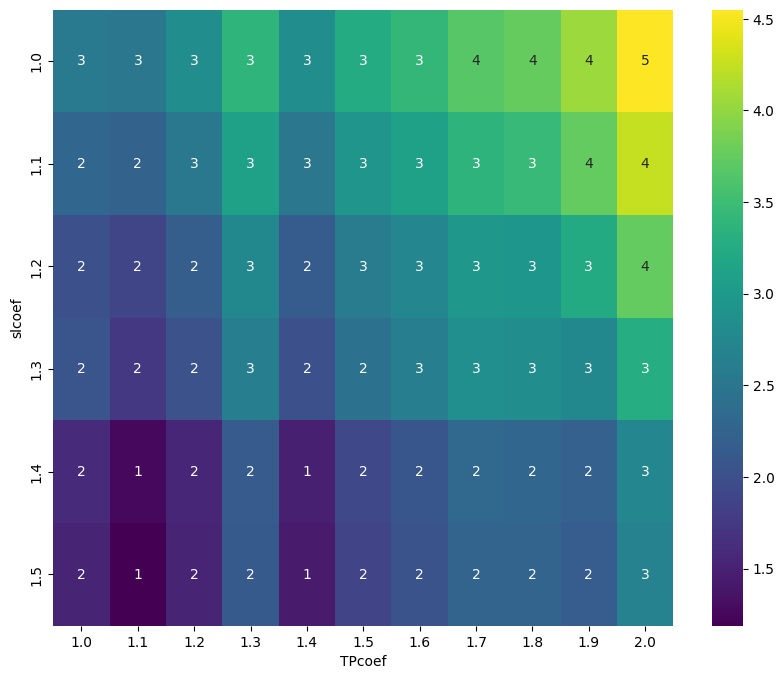

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()

In [23]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1327', ...)

# **Final Verdict**

In [25]:
##Out of all the strategy the last one (Bollinger band and RSI strategy) seem to be working best
##With good win rate across different type of asset
##We can integrate this strategy signal in our Deep Learning Model